In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
sys.path.insert(0, '..\\..\\..\\HDF5')
from HDF5 import *

In [33]:
sweep = 0

saved_sweep = load_hdf5_to_dict(hdf5_file = '2024-04-18.hdf5', group_name = 'NA_S21')
I, N_pts, Q, Span, f = saved_sweep[str(sweep)].values()

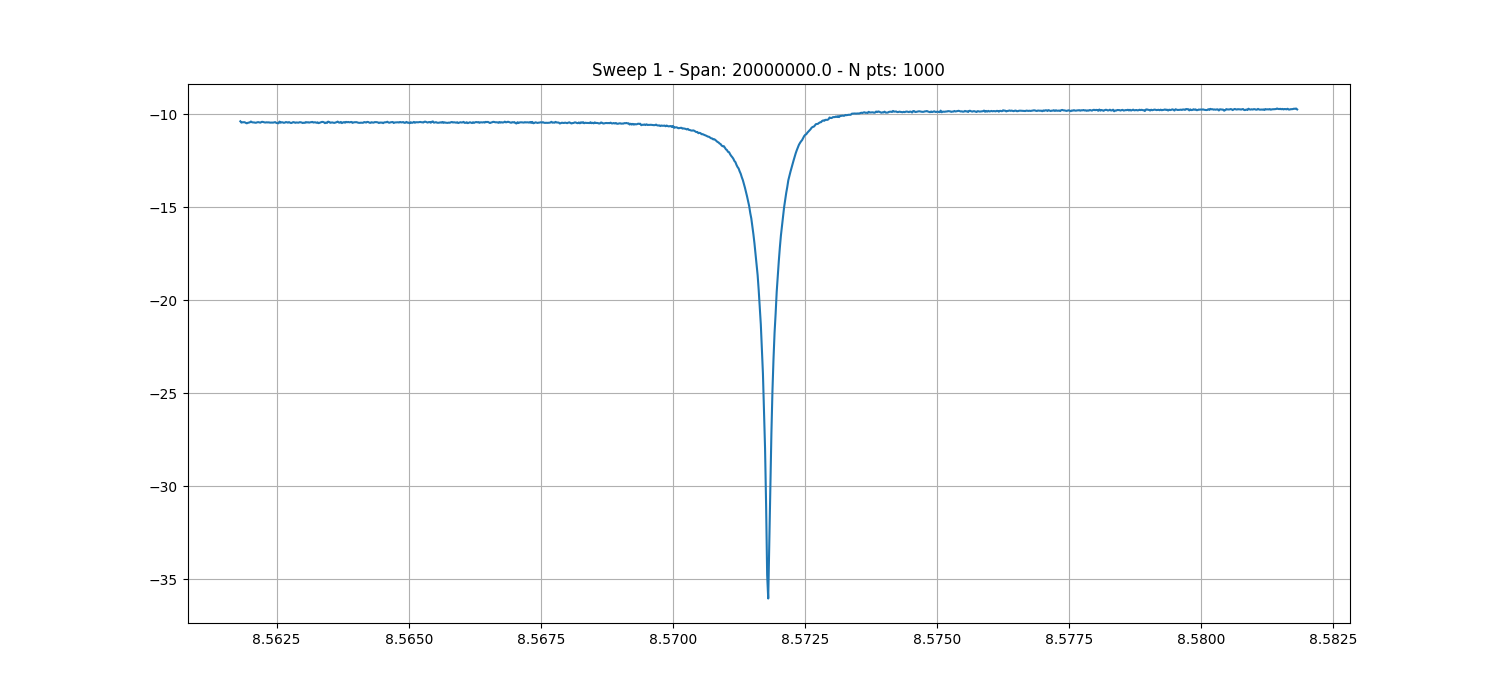

15

In [34]:
amp = np.array(10*np.log10(I**2 + Q**2))
fig = plt.subplots(figsize = (15,7))[0]
plt.clf()
plt.grid()
plt.title(f'Sweep {sweep+1} - Span: {Span} - N pts: {N_pts}')
plt.plot(f, amp)
plt.show()

def on_key(event):
	global sweep
	global saved_sweep
	if event.key == 'right':
		sweep += 1
	elif event.key == 'left':
		sweep -= 1

	if (sweep+1) > len(saved_sweep.keys()):
		sweep = 0
	elif sweep == -1:
		sweep = len(saved_sweep.keys())-1

	I, N_pts, Q, Span, f = saved_sweep[str(sweep)].values()
	amp = np.array(10*np.log10(I**2 + Q**2))

	# clear frame
	plt.clf()
	plt.title(f'Sweep {sweep+1} - Span: {Span} - N pts: {N_pts}')
	plt.grid()
	plt.plot(f, amp)
	# plt.scatter(x[idx],y[idx], color = 'orange')
	plt.draw() # redraw

fig.canvas.mpl_connect('key_press_event',on_key)



# Fitting

26.73524342568171
Minimum: 16.958130127213483
Maximum: 36.51235672414994
f peak: 8.571796247
Gamma: 8.7513999998734e-05


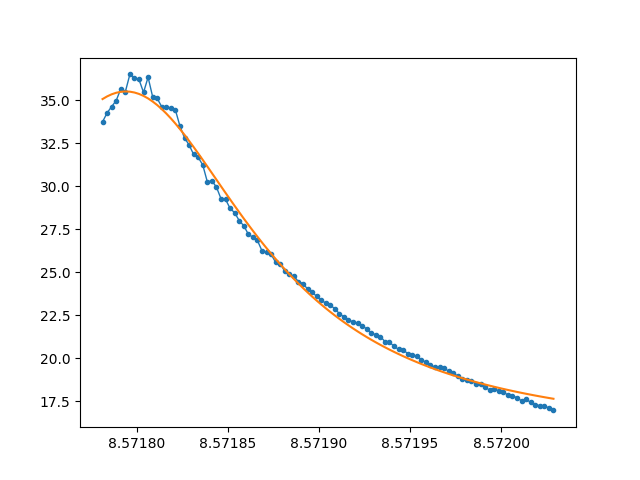

In [15]:
# potenza inviata = -15 dmb
saved_sweep = vna.r_hdf_data(hdf5_file, 'NA_S21', 11)
# print(saved_sweep)
I, a, Q, b, f = saved_sweep.values()

amp = 10*np.log10(I**2 + Q**2) # amplitude

# plt.clf()
# plt.plot(f, amp)
# plt.show()


a_l = a*0.4
a_r = a*0.6
mask = (f < 8.57203) & (f > 8.57178)
y = (-amp[mask]).tolist()
x = f[mask].tolist()

x_c = x
y_c = y

D1_min = min(y)
D1_max = max(y)
idx_max = y.index(max(y))
D1_peak = x[idx_max]

half_height = (D1_max + D1_min)/2
print(half_height)

argMax = np.argmax(y)
idx_L = np.argmin(np.abs(half_height - np.array(y[:argMax])))
idx_R = np.argmin(np.abs(half_height - np.array(y[argMax:]))) + (idx_max + 1)

# fig = plt.figure()
# plt.plot(x, y)
# plt.plot([x[idx_L],x[idx_R]], [y[idx_L],y[idx_R]], ls = 'none', marker = 'o')

D1_gamma = x[idx_R] - x[idx_L]
# plt.show()

print('Minimum:', D1_min)
print('Maximum:', D1_max)
print('f peak:', D1_peak)
print('Gamma:', D1_gamma)

# Amplitude, x0, Gamma, Minimum
pars = [-10, ]
pars = [D1_max, D1_peak, D1_gamma, D1_min]

pars_opt, err_cov = curve_fit(Lorentzian, x, y, pars)
plt.figure()
plt.plot(x_c, y_c, marker = '.', linewidth = 1)   
plt.plot(x_c, Lorentzian(x_c, *pars_opt))